In [1]:
import torch
import plotting
import numpy as np
import matplotlib
import hypothesis
import matplotlib.pyplot as plt
import os

from matplotlib import rc
from util import load_ratio_estimator
from util import download
from util import load
from plotting import compute_1d_pdf
from plotting import compute_2d_pdf
from plotting import compute_1d_lr
from plotting import compute_2d_lr
from plotting import plot_1d_confidence_levels
from plotting import plot_1d_contours
from hypothesis.visualization.util import make_square

## Download the required data dependencies

In [2]:
# Download (part-of) the presimulated test data (about 47 MB)
# https://drive.google.com/file/d/1Z3d2pZXzcyR9nAj3kZBTTevlKugiHCnO/view?usp=sharing

if not os.path.exists("data.tar.gz"):
    download("1Z3d2pZXzcyR9nAj3kZBTTevlKugiHCnO", destination="data.tar.gz")
    !tar -zxf data.tar.gz # Unpack

ages = np.load("ages.npy")
masses = np.load("masses.npy")
densities = np.load("density-contrasts-cut-noised.npy")
phi = np.load("phi-cut.npy")

print("Completed!")

Completed!


In [3]:
# Download all pre-trained models (about 3.1 GB)
# https://drive.google.com/file/d/1W0WvrdtVvyTu24FBtvtvQz1pKJxMBO_w/view?usp=sharing

if not os.path.exists("models.tar.gz"):
    download("1W0WvrdtVvyTu24FBtvtvQz1pKJxMBO_w", destination="models.tar.gz")
    !tar -zxf models.tar.gz # Unpack
print("Completed!")

Completed!


## Overview

Load the ratio estimators:

In [ ]:
r_1d = load("resnet-18", marginalized=True)
r_2d = load("resnet-18", marginalized=False)

After training and statistical validation of the ratio estimators, they can be used to compute the posteriors. For instance, on the following observation:

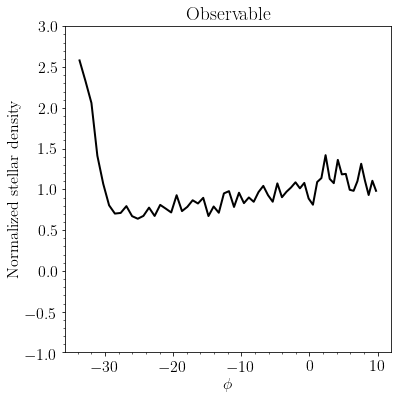

In [7]:
index = np.random.randint(0, len(ages))
index = 98627
groundtruth_age = torch.from_numpy(ages[index])
groundtruth_mass = torch.from_numpy(masses[index])
stellar_density = torch.from_numpy(densities[index]).float().view(1, -1)

# Show how the observable looks like
figure = plt.figure(figsize=(6, 6))
plt.title("Observable")
plt.plot(phi, stellar_density.view(-1).numpy(), lw=2, color="black")
plt.xlabel(r"$\phi$")
plt.minorticks_on()
plt.ylabel("Normalized stellar density")
plt.ylim([-1, 3])
make_square(plt.gca())
plt.show()

The posterior $p(\vartheta\vert x)$ is subsequently computed as

In [ ]:
figure = plt.figure(figsize=(6, 6))

r_1d = load("mlp-bn", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("resnet-18-bn", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("resnet-50-bn", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("all-bn", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)

plt.xlabel(r"$m_\textsc{wdm}$")
plt.ylabel("Posterior density")
plt.axvline(groundtruth_mass, color="red", lw=2)
plt.title("Posterior")
plot_1d_contours(plt.gca(), pdf)
plt.minorticks_on()
make_square(plt.gca())
plt.show()

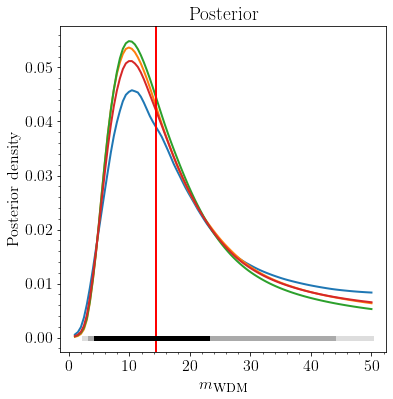

In [8]:
figure = plt.figure(figsize=(6, 6))

r_1d = load("mlp", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("resnet-18", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("resnet-50", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)
r_1d = load("all", marginalized=True)
pdf, _ = compute_1d_pdf(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)

# Show the posterior
plt.xlabel(r"$m_\textsc{wdm}$")
plt.ylabel("Posterior density")
plt.axvline(groundtruth_mass, color="red", lw=2)
plt.title("Posterior")
plot_1d_contours(plt.gca(), pdf)
plt.minorticks_on()
make_square(plt.gca())
plt.show()

In [ ]:
figure = plt.figure(figsize=(6, 6))

r_1d = load("mlp-bn", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("resnet-18-bn", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("resnet-50-bn", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("all-bn", marginalized=True)
pdf, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)

# Show the posterior
plt.xlabel(r"$m_\textsc{wdm}$")
plt.ylabel("Likelihood ratio test-statistic")
plt.axvline(groundtruth_mass, color="red", lw=2)
plt.minorticks_on()
plot_1d_confidence_levels(plt.gca(), lr)
make_square(plt.gca())
plt.show()

In [ ]:
figure = plt.figure(figsize=(6, 6))

r_1d = load("mlp", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("resnet-18", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("resnet-50", marginalized=True)
lr, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), lr, lw=2)
r_1d = load("all", marginalized=True)
pdf, _ = compute_1d_lr(r_1d, stellar_density)
plt.plot(np.linspace(1, 50, 100), pdf, lw=2)

# Show the posterior
plt.xlabel(r"$m_\textsc{wdm}$")
plt.ylabel("Likelihood ratio test-statistic")
plt.axvline(groundtruth_mass, color="red", lw=2)
plt.minorticks_on()
plot_1d_confidence_levels(plt.gca(), lr)
make_square(plt.gca())
plt.show()

## Model misspecification (detection)

In [ ]:
import warnings

from hypothesis.diagnostic import DensityDiagnostic
from util import MarginalizedAgePrior

# Disable warnings produced by integrator
warnings.filterwarnings('ignore')

In [ ]:
r_1d = load("resnet-18", marginalized=True)

In [ ]:
@torch.no_grad()
def diagnose(ratio_estimator, observable):
    # Prepare the diagnostic
    prior = MarginalizedAgePrior()
    space = [[prior.low.item(), prior.high.item()]]
    diagnostic = DensityDiagnostic(space)
    observable = observable.view(1, -1)
    density = observable.to(hypothesis.accelerator)
    # Define the pdf function for integration
    def pdf(mass):
        mass = torch.tensor(mass).view(1, 1).float()
        mass = mass.to(hypothesis.accelerator)
        log_posterior = prior.log_prob(mass).item() + ratio_estimator.log_ratio(inputs=mass, outputs=density)

        return log_posterior.exp().item()
    # Compute the test
    diagnostic.test(pdf)

    return diagnostic.areas[0]

In [ ]:
index = np.random.randint(0, len(ages))
groundtruth_age = torch.from_numpy(ages[index])
groundtruth_mass = torch.from_numpy(masses[index])
stellar_density = torch.from_numpy(densities[index]).float().view(1, -1)

# Show how the observable looks like
figure = plt.figure(figsize=(6, 6))
plt.title("Observable")
plt.plot(phi, stellar_density.view(-1).numpy(), lw=2, color="black")
plt.xlabel(r"$\phi$")
plt.minorticks_on()
plt.ylabel("Normalized stellar density")
plt.ylim([-1, 3])
make_square(plt.gca())
plt.show()

In [ ]:
integrated_area = diagnose(r_1d, stellar_density)

print("Integrated area of a synthetic (simulated) observable:", integrated_area)

In [ ]:
import scipy.signal

stellar_density = torch.from_numpy(scipy.signal.square(phi * 2, duty=0.2)).float() * 0.5 + 1
#stellar_density = torch.from_numpy(scipy.signal.sawtooth(2 * np.pi * 1 * phi)).float() + 1
#stellar_density = torch.from_numpy(np.ones(len(phi))).float() + torch.randn(len(phi)) * 0.5

# Show how the fake observable looks like
figure = plt.figure(figsize=(6, 6))
plt.title("Out-of-distribution observable")
plt.plot(phi, stellar_density.view(-1).numpy(), lw=2, color="black")
plt.xlabel(r"$\phi$")
plt.minorticks_on()
plt.ylabel("Normalized stellar density")
#plt.ylim([-1, 3])
make_square(plt.gca())
plt.show()

In [ ]:
integrated_area = diagnose(r_1d, stellar_density)

print("Integrated area of an out of distribution observable:", integrated_area)